In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import os
import random
import math
import numpy as np

from PIL import Image
from skimage import io
from skimage import exposure
import cv2
import matplotlib.pyplot as plt

In [4]:
def rename_images(folder_path):
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Filter only image files (you may need to customize this based on your image extensions)
    image_files = [file for file in file_list if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Sort the image files to ensure consistent renaming
    image_files.sort()

    # Rename the images with incremental names
    for index, old_name in enumerate(image_files):
        new_name = f"image_{index + 1}.png"  # Change the extension based on your file types
        old_path = os.path.join(folder_path, old_name)
        new_path = os.path.join(folder_path, new_name)

        if os.path.exists(new_path):
            print(f"File '{new_name}' already exists.")
        else:
            os.rename(old_path, new_path)

    print("Images renamed successfully.")

# Replace 'path/to/your/folder' with the actual path to your folder
rename_images("drive/My Drive/Diabetic retinopathy/dataset/Fundus/train_images")



Images renamed successfully.


# Preprocessing Images

In [5]:
def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    return image

In [6]:
def resize_image(image, target_size=(512, 512)):
    # Resize the image to a target size
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [7]:
def apply_clahe(image, clip_limit=2.0, grid_size=(8, 8)):
    # Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    clahe_image = clahe.apply(gray)
    colored_clahe_image = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2BGR)
    return colored_clahe_image

In [8]:
def remove_noise(image, kernel_size=(5, 5)):
    # Remove noise using a Gaussian blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

In [9]:
def normalize_image(image):
    # Normalize pixel values to the range [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

In [10]:
def preprocess_image(image_path):
    # Load image
    original_image = load_image(image_path)

    # Resize image
    resized_image = resize_image(original_image)

    # Apply CLAHE
    clahe_image = apply_clahe(resized_image)

    # Remove noise
    denoised_image = remove_noise(clahe_image)

    # Normalize image
    normalized_image = normalize_image(denoised_image)

    return normalized_image

In [11]:
def preprocess_dataset(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            preprocessed_image = preprocess_image(image_path)

            # Create a subfolder in the output folder
            subfolder = os.path.join(output_folder, 'preprocessed_images')
            if not os.path.exists(subfolder):
                os.makedirs(subfolder)

            # Save the preprocessed image to the subfolder
            output_path = os.path.join(subfolder, filename)
            cv2.imwrite(output_path, (preprocessed_image * 255).astype(np.uint8))

In [12]:
def display_images(original, processed, title1='Original Image', title2='Processed Image'):
    # Display original and processed images side by side
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)), plt.title(title2)
    plt.show()

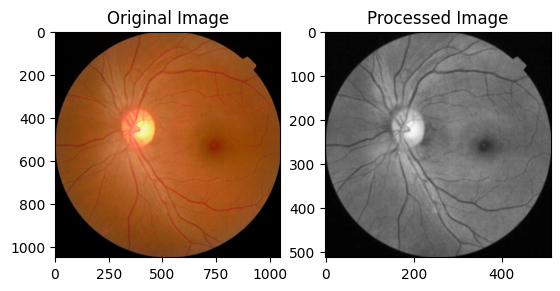

In [13]:
input_folder = "drive/My Drive/Diabetic retinopathy/dataset/Fundus/train_images"
output_folder ="drive/My Drive/Diabetic retinopathy/dataset/Fundus/processed_train_images"
# Preprocess the dataset
preprocess_dataset(input_folder, output_folder)

# Example usage for displaying original and preprocessed images
sample_image_path = os.path.join(input_folder, os.listdir(input_folder)[0])
original_image = load_image(sample_image_path)
preprocessed_image = preprocess_image(sample_image_path)

# Display original and preprocessed images
display_images(original_image, preprocessed_image)